In [19]:
# Add cloud to sst glorys
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

sel_time = "2020-02-20"
folder_data = "/Odyssey/private/t22picar/data/glorys_2020_0m/"
file_glorys = "glorys_multi_2020-01-20-2021-04-20.nc"
maps_glorys = xr.open_dataset(folder_data+file_glorys).sel(time=sel_time)
lat_simu = maps_glorys.latitude.values
lon_simu = maps_glorys.longitude.values
sst_simu = maps_glorys.thetao

folder_data = "/Odyssey/private/t22picar/data/sst_L3/"
file_sst_obs = "cmems_obs-sst_glo_phy_my_l3s_P1D-m_adjusted_sea_surface_temperature_179.95W-179.95E_79.95S-79.95N_2020-01-20-2021-04-20.nc"
maps_sst = xr.open_dataset(folder_data+file_sst_obs).sel(time=sel_time)
sst_sat = maps_sst.adjusted_sea_surface_temperature.values-273.15
lat_sat = maps_sst.latitude.values
lon_sat = maps_sst.longitude.values


In [23]:
ls /Odyssey/private/t22picar/data/glorys_2020_0m/

cmems_mod_glo_phy_my_0.083deg_P1D-m_multi-vars_180.00W-179.92E_80.00S-90.00N_0.49m_2010-01-01-2019-12-31.nc
cmems_mod_glo_phy_my_0.083deg_P1D-m_multi-vars_180.00W-179.92E_80.00S-90.00N_0.49m_2019-12-31.nc
glorys_multi_2020-01-20-2021-04-20_4th.nc
glorys_multi_2020-01-20-2021-04-20.nc


In [24]:
def plot_map_zoom(var,lon,lat,title=None,vmax=20,vmin=10):

    fig, axs = plt.subplots(nrows=1,ncols=1,
                    subplot_kw={'projection': ccrs.PlateCarree()},
                    figsize=(11*1,7.5*1))
    #p0 = plt.pcolormesh(lon2D, lat2D, norm_uv, cmap='jet',vmax=1)
    p0 = plt.pcolormesh(lon, lat, var, cmap='RdBu_r')

    if title:
        plt.title(title)

    axs.coastlines(resolution='10m', lw=0.5)
    #axs.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#EEEEEE', edgecolor='face',alpha=1)

    # optional add grid lines
    p0.axes.gridlines(color='black', alpha=0., linestyle='--')

    # draw parallels/meridiens and write labels
    gl = p0.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                            linewidth=0.1, color='black', alpha=0.5, linestyle='--')
    # adjust labels to taste
    gl.top_labels = True
    gl.right_labels = False
    gl.bottom_labels = False
    gl.left_labels = True
    #gl.xlabels_bottom = False
    gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
    gl.xlocator = mticker.FixedLocator([-180, -60, 0,  60, 180])
    #gl.xformatter = LONGITUDE_FORMATTER
    #gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}

    #get size and extent of axes:
    axpos = axs.get_position()
    pos_x = axpos.x0+axpos.width + 0.01# + 0.25*axpos.width
    pos_y = axpos.y0
    cax_width = 0.02
    cax_height = axpos.height
    #create new axes where the colorbar should go.
    #it should be next to the original axes and have the same height!
    pos_cax = fig.add_axes([pos_x,pos_y,cax_width,cax_height])
    cbar=plt.colorbar(p0, cax=pos_cax)
    cbar.set_label('°C')

    zoom_extent = [-20, 0, 40, 60]  # Exemple de zoom sur l'Europe

    # Ajouter un zoom sur une région spécifique
    ax_zoom = fig.add_axes([0.25, 0.10, 0.5, 0.5], projection=ccrs.PlateCarree())
    ax_zoom.set_extent(zoom_extent, crs=ccrs.PlateCarree())  # Exemple de zoom sur l'Europe
    ax_zoom.coastlines()
    contour_zoom = ax_zoom.pcolormesh(lon, lat, var, cmap='RdBu_r',transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin)

    #cax = fig.add_axes([ax_zoom.get_position().x1+0.01,ax_zoom.get_position().y0,0.02,ax_zoom.get_position().height])
    cax = fig.add_axes([ax_zoom.get_position().x0,ax_zoom.get_position().y0-0.03,ax_zoom.get_position().width,0.02])
    cbar = plt.colorbar(contour_zoom,cax=cax,orientation="horizontal")


    # Ajouter les contours de la zone zoomée sur la carte principale
    zoom_rect = plt.Rectangle((zoom_extent[0], zoom_extent[2]),
                            zoom_extent[1] - zoom_extent[0],
                            zoom_extent[3] - zoom_extent[2],
                            linewidth=2, edgecolor='k', facecolor='none',
                            transform=ccrs.PlateCarree())
    axs.add_patch(zoom_rect)

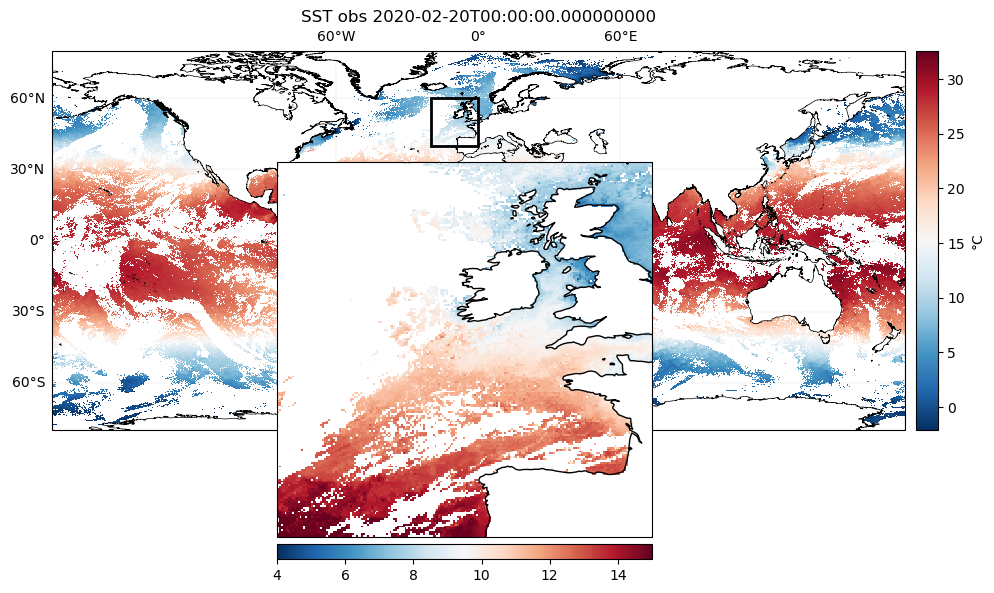

In [26]:
plot_map_zoom(sst_sat,lon_sat,lat_sat,title="SST obs {0}".format(maps_glorys.time.values),vmax=15,vmin= 4)

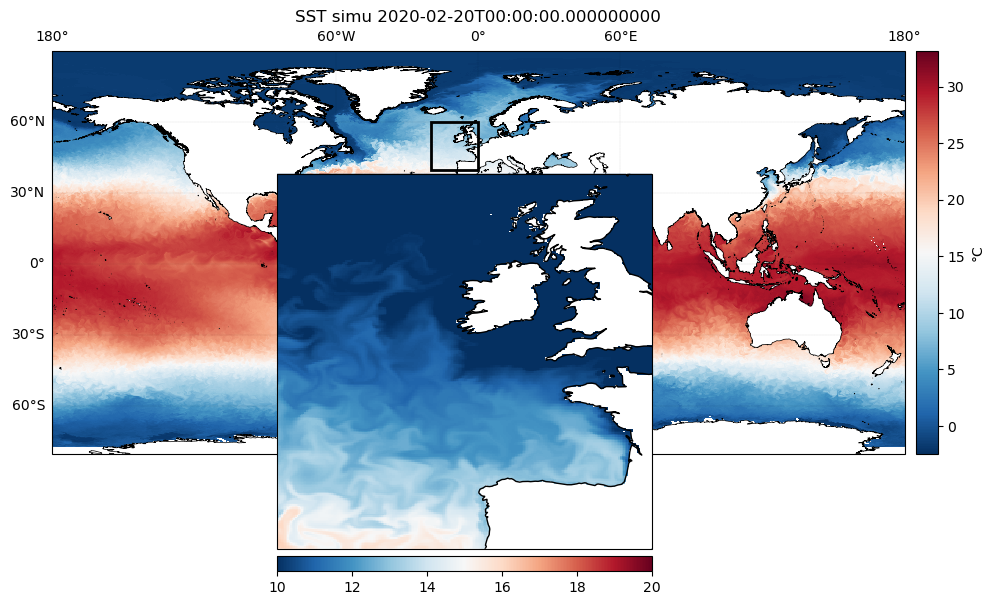

In [22]:
plot_map_zoom(sst_simu[0,:],lon_simu,lat_simu,title="SST simu {0}".format(maps_glorys.time.values,vmax=15))

In [5]:
sst_simu_i = sst_simu[sst_simu.time == maps_sst.time[0]][0,0,:,:]
sst_simu_i =  sst_simu_i.interp(latitude=lat_sat, longitude=lon_sat,method="linear")
sst_simu_i = sst_simu_i.values
sst_simu_i = np.where(np.isnan(sst_sat),np.nan,sst_simu_i)


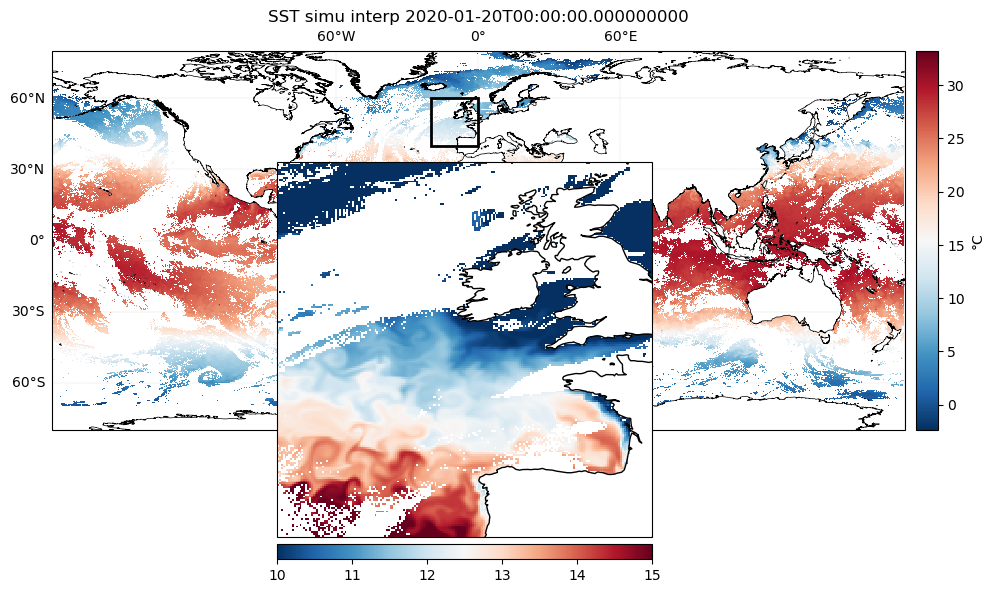

In [6]:
plot_map_zoom(sst_simu_i,lon_sat,lat_sat,title="SST simu interp {0}".format(maps_glorys.time.values[0]),vmax=15)

In [ ]:
# Original grid 1/12 (2041,4320) --> 1/4
new_sizes = [size // 3 for size in (2041, 4320)]
print('new sizes: {}'.format(new_sizes))

def regrid_da(regrid_sizes, da: xr.DataArray):

        lat_space = np.linspace(start=da.lat.min(), stop=da.lat.max(), num=regrid_sizes[0])
        lon_space = np.linspace(start=da.lon.min(), stop=da.lon.max(), num=regrid_sizes[1])

        new_da = da.interp({"lat":lat_space, "lon":lon_space}, method="linear")

        return new_da

new sizes: [680, 1440]


In [5]:
maps_sst_regrid = regrid_da(new_sizes,maps_sst)

NameError: name 'maps_sst' is not defined